config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/874M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:551: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Epoch 1/10: 100%|██████████| 1804/1804 [14:37<00:00,  2.06batch/s, Avg Loss=0.927]


Epoch [1/10] - Avg Loss: 0.9275
Epoch [1/10] - Accuracy on Test Data: 0.8020


Epoch 2/10: 100%|██████████| 1804/1804 [14:37<00:00,  2.06batch/s, Avg Loss=0.424]


Epoch [2/10] - Avg Loss: 0.4244
Epoch [2/10] - Accuracy on Test Data: 0.8660


Epoch 3/10: 100%|██████████| 1804/1804 [14:37<00:00,  2.06batch/s, Avg Loss=0.211]


Epoch [3/10] - Avg Loss: 0.2109
Epoch [3/10] - Accuracy on Test Data: 0.9230


Epoch 4/10: 100%|██████████| 1804/1804 [14:36<00:00,  2.06batch/s, Avg Loss=0.118]


Epoch [4/10] - Avg Loss: 0.1176
Epoch [4/10] - Accuracy on Test Data: 0.9219


Epoch 5/10: 100%|██████████| 1804/1804 [14:34<00:00,  2.06batch/s, Avg Loss=0.0798]


Epoch [5/10] - Avg Loss: 0.0798
Epoch [5/10] - Accuracy on Test Data: 0.9253


Epoch 6/10: 100%|██████████| 1804/1804 [14:33<00:00,  2.06batch/s, Avg Loss=0.0661]


Epoch [6/10] - Avg Loss: 0.0661
Epoch [6/10] - Accuracy on Test Data: 0.9399


Epoch 7/10: 100%|██████████| 1804/1804 [14:34<00:00,  2.06batch/s, Avg Loss=0.0553]


Epoch [7/10] - Avg Loss: 0.0553
Epoch [7/10] - Accuracy on Test Data: 0.9210


Epoch 8/10: 100%|██████████| 1804/1804 [14:33<00:00,  2.06batch/s, Avg Loss=0.0478]


Epoch [8/10] - Avg Loss: 0.0478
Epoch [8/10] - Accuracy on Test Data: 0.9388


Epoch 9/10: 100%|██████████| 1804/1804 [14:35<00:00,  2.06batch/s, Avg Loss=0.0358]


Epoch [9/10] - Avg Loss: 0.0358
Epoch [9/10] - Accuracy on Test Data: 0.9395


Epoch 10/10: 100%|██████████| 1804/1804 [14:35<00:00,  2.06batch/s, Avg Loss=0.0409]


Epoch [10/10] - Avg Loss: 0.0409
Epoch [10/10] - Accuracy on Test Data: 0.9417


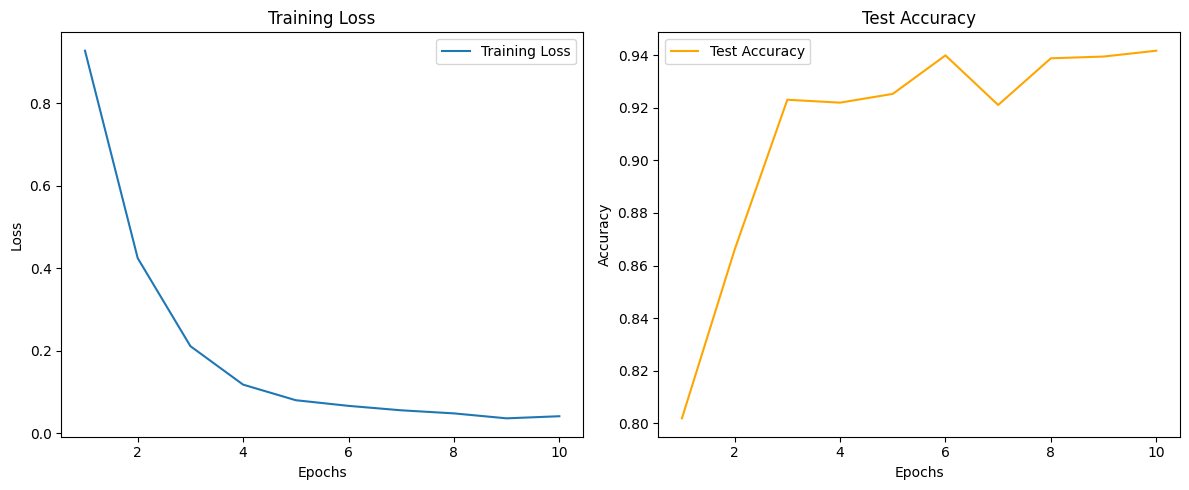

Evaluating: 100%|██████████| 451/451 [01:02<00:00,  7.23it/s]


Overall Performance Metrics:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       628
           1       0.97      0.91      0.94       662
           2       0.90      0.96      0.93       636
           3       0.97      0.87      0.92       630
           4       0.97      0.94      0.95       646
           5       0.94      0.99      0.96       678
           6       0.97      0.93      0.95       629

    accuracy                           0.94      4509
   macro avg       0.94      0.94      0.94      4509
weighted avg       0.94      0.94      0.94      4509


Overall Accuracy: 0.9417


Per-Class Performance:

Class 0: Accuracy = 0.9889
Class 1: Accuracy = 0.9094
Class 2: Accuracy = 0.9638
Class 3: Accuracy = 0.8698
Class 4: Accuracy = 0.9443
Class 5: Accuracy = 0.9867
Class 6: Accuracy = 0.9269


In [1]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-large", num_labels=7)
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")

# Load dataset
df = pd.read_excel('/kaggle/input/isear-dataset/combined dataset.xlsx')

# Split dataset
Comment_train, Comment_test, Label_train, Label_test = train_test_split(df['content'], df['labels'], test_size=0.2, random_state=18)

# Tokenize data
encodedata_train = tokenizer.batch_encode_plus(
    Comment_train.astype(str).tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=100,
    return_tensors='pt',
    padding='max_length',
    truncation=True
)

encodedata_test = tokenizer.batch_encode_plus(
    Comment_test.astype(str).tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=100,
    return_tensors='pt',
    padding='max_length',
    truncation=True
)

# Prepare data for DataLoader
input_ids_train = encodedata_train['input_ids']
attention_masks_train = encodedata_train['attention_mask']
labels_train = torch.tensor(Label_train.to_numpy(), dtype=torch.long)

input_ids_test = encodedata_test['input_ids']
attention_masks_test = encodedata_test['attention_mask']
labels_test = torch.tensor(Label_test.to_numpy(), dtype=torch.long)

tensordataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
tensordataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

train_loader = DataLoader(tensordataset_train, batch_size=10, shuffle=True)
test_loader = DataLoader(tensordataset_test, batch_size=10, shuffle=False)

# Define loss function and optimizer
loss_ftn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define number of epochs
num_epochs = 10

# Lists for storing training loss and accuracy per epoch
train_losses = []
test_accuracies = []

# Training and evaluation loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    # Training
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch')
    for batch in progress_bar:
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_masks, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs['loss']
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        avg_loss = total_loss / (progress_bar.n + 1)
        progress_bar.set_postfix({'Avg Loss': avg_loss})

    train_losses.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Avg Loss: {avg_loss:.4f}")

    # Evaluation
    model.eval()
    total_correct = 0
    total_samples = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_masks, labels = batch
            input_ids, attention_masks, labels = input_ids.to(device), attention_masks.to(device), labels.to(device)
            outputs = model(input_ids, attention_mask=attention_masks)
            _, predicted = torch.max(outputs['logits'], 1)

            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = total_correct / total_samples if total_samples > 0 else 0
    test_accuracies.append(accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}] - Accuracy on Test Data: {accuracy:.4f}')

# Plotting Loss and Accuracy graphs
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(epochs_range, test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Detailed Performance Metrics Evaluation
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        input_ids, attention_masks, labels = batch
        input_ids, attention_masks, labels = input_ids.to(device), attention_masks.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits
        _, preds = torch.max(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Performance metrics
conf_matrix = confusion_matrix(all_labels, all_preds)
class_report = classification_report(all_labels, all_preds, labels=list(range(7)), zero_division=1)
accuracy = accuracy_score(all_labels, all_preds)

print("\nOverall Performance Metrics:\n")
print(class_report)
print(f"\nOverall Accuracy: {accuracy:.4f}\n")

# Per-class performance
print("\nPer-Class Performance:\n")
for i in range(7):  # Adjust number of classes accordingly
    class_accuracy = conf_matrix[i, i] / conf_matrix[i, :].sum() if conf_matrix[i, :].sum() > 0 else 0
    print(f"Class {i}: Accuracy = {class_accuracy:.4f}")